In [1]:
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


<IPython.core.display.Javascript object>

In [3]:
from wordcloud import WordCloud, STOPWORDS

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import linear_kernel

<IPython.core.display.Javascript object>

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import pairwise_distances

from sklearn.metrics import mean_squared_error

from math import sqrt

<IPython.core.display.Javascript object>

In [5]:
data_path = os.path.join(".", "Data")
movies = pd.read_csv(
    os.path.join(data_path, "movies.csv"), sep="\t", encoding="latin-1"
)
ratings = pd.read_csv(
    os.path.join(data_path, "ratings.csv"), sep="\t", encoding="latin-1"
)
users = pd.read_csv(os.path.join(data_path, "users.csv"), sep="\t", encoding="latin-1")

<IPython.core.display.Javascript object>

In [6]:
movies

,movie_id,title,genres,movie_embed_id
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,3947
3879,3949,Requiem for a Dream (2000),Drama,3948
3880,3950,Tigerland (2000),Drama,3949
3881,3951,Two Family House (2000),Drama,3950


<IPython.core.display.Javascript object>

In [7]:
movies.shape

(3883, 4)

<IPython.core.display.Javascript object>

In [8]:
users

,user_id,gender,age,occupation,zipcode,age_range,occupation_decoded
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,Above 56,Self-employed
2,3,M,25,15,55117,25-34,Scientist
3,4,M,45,7,02460,45-49,Executive/Manager
4,5,M,25,20,55455,25-34,Writer
...,...,...,...,...,...,...,...
6035,6036,F,25,15,32603,25-34,Scientist
6036,6037,F,45,1,76006,45-49,Academic/Educator
6037,6038,F,56,1,14706,Above 56,Academic/Educator
6038,6039,F,45,0,01060,45-49,Other or not specified


<IPython.core.display.Javascript object>

In [9]:
import re

users.loc[:, "occupation_decoded"] = users.occupation_decoded.str.replace(
    re.compile(r"\bOther\b"), "Others"
)

<IPython.core.display.Javascript object>

In [10]:
ratings

,user_id,movie_id,rating,time_stamp,user_embed_id,movie_embed_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,6039,1090
1000205,6040,1094,5,956704887,6039,1093
1000206,6040,562,5,956704746,6039,561
1000207,6040,1096,4,956715648,6039,1095


<IPython.core.display.Javascript object>

In [11]:
ratings.shape

(1000209, 6)

<IPython.core.display.Javascript object>

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_id        3883 non-null   int64 
 1   title           3883 non-null   object
 2   genres          3883 non-null   object
 3   movie_embed_id  3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


<IPython.core.display.Javascript object>

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             6040 non-null   int64 
 1   gender              6040 non-null   object
 2   age                 6040 non-null   int64 
 3   occupation          6040 non-null   int64 
 4   zipcode             6040 non-null   object
 5   age_range           6040 non-null   object
 6   occupation_decoded  6040 non-null   object
dtypes: int64(3), object(4)
memory usage: 330.4+ KB


<IPython.core.display.Javascript object>

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   user_id         1000209 non-null  int64
 1   movie_id        1000209 non-null  int64
 2   rating          1000209 non-null  int64
 3   time_stamp      1000209 non-null  int64
 4   user_embed_id   1000209 non-null  int64
 5   movie_embed_id  1000209 non-null  int64
dtypes: int64(6)
memory usage: 45.8 MB


<IPython.core.display.Javascript object>

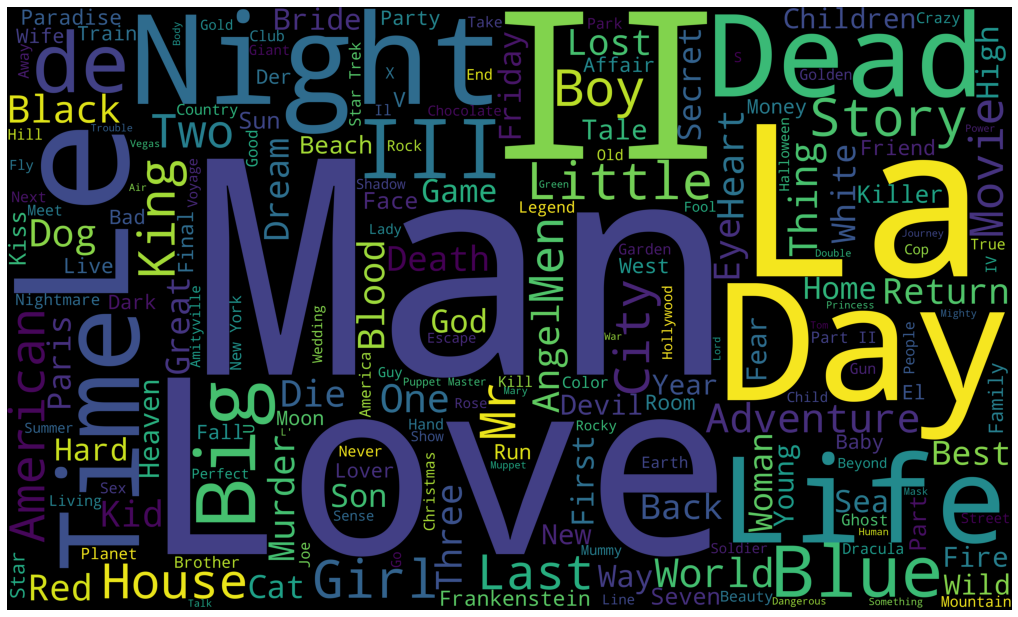

<IPython.core.display.Javascript object>

In [15]:
# Creating a wordcloud of the Movie Title
movie_titles = movies["title"].astype(str)
movie_titles_list = " ".join(movie_titles)
title_wordcloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", height=3000, width=5000
).generate(movie_titles_list)

plt.figure(figsize=(18, 15))
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()

In [16]:
ratings["rating"].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<IPython.core.display.Javascript object>

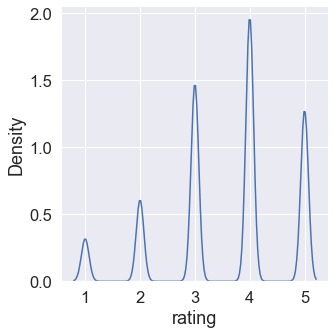

<IPython.core.display.Javascript object>

In [17]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
sns.displot(ratings["rating"].fillna(ratings["rating"].median()), kind="kde")

plt.show()

In [18]:
movie_user_ratings = pd.merge(
    pd.merge(movies, ratings, on="movie_id"), users, on="user_id"
)
movie_user_ratings.sort_values("rating", ascending=False)[["title", "rating"]].head(20)

,title,rating
0,Toy Story (1995),5
489283,American Beauty (1999),5
489259,Election (1999),5
489257,"Matrix, The (1999)",5
489256,Dead Ringers (1988),5
489237,Rushmore (1998),5
489236,"Simple Plan, A (1998)",5
489226,Hands on a Hard Body (1996),5
489224,Pleasantville (1998),5
489212,Say Anything... (1989),5


<IPython.core.display.Javascript object>

In [19]:
genre_set = set()
for genre in movies["genres"].str.split("|"):
    for gen in genre:
        genre_set.add(gen)

genre_dict = dict.fromkeys(genre_set, 0)
for genre in movies["genres"].str.split("|"):
    for gen in genre:
        genre_dict[gen] += 1

genre_list = []
for key, val in genre_dict.items():
    genre_list.append([str(key), val])
genre_list.sort(key=lambda x: x[1], reverse=True)
genre_list

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Western', 68],
 ['Fantasy', 68],
 ['Film-Noir', 44]]

<IPython.core.display.Javascript object>

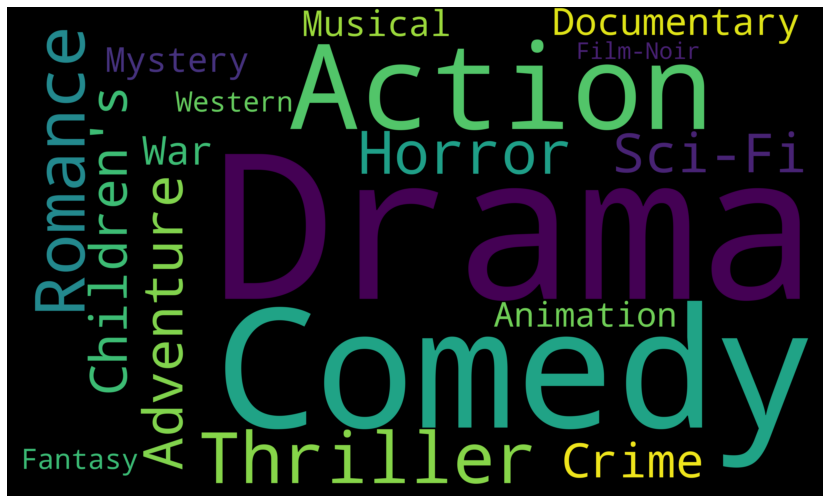

<IPython.core.display.Javascript object>

In [20]:
genre_dicti = {x[0]: x[1] for x in genre_list}
genre_wordcloud = WordCloud(
    background_color="black", height=3000, width=5000
).generate_from_frequencies(genre_dicti)

plt.figure(figsize=(15, 9))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Content-based Recommender

In [21]:
movies.loc[:, "genres"] = movies["genres"].str.split("|")

<IPython.core.display.Javascript object>

In [22]:
movies.loc[:, "genres"] = movies["genres"].astype(str)

<IPython.core.display.Javascript object>

In [23]:
movies["genres"]

0        ['Animation', "Children's", 'Comedy']
1       ['Adventure', "Children's", 'Fantasy']
2                        ['Comedy', 'Romance']
3                          ['Comedy', 'Drama']
4                                   ['Comedy']
                         ...                  
3878                                ['Comedy']
3879                                 ['Drama']
3880                                 ['Drama']
3881                                 ['Drama']
3882                     ['Drama', 'Thriller']
Name: genres, Length: 3883, dtype: object

<IPython.core.display.Javascript object>

In [24]:
tfidf = TfidfVectorizer(
    analyzer="word", ngram_range=(1, 2), min_df=0, stop_words="english"
)
tfidf_array = tfidf.fit_transform(movies["genres"]).toarray()
tfidf_array.shape

(3883, 127)

<IPython.core.display.Javascript object>

In [25]:
tfidf.get_feature_names_out()

array(['action', 'action adventure', 'action animation',
       'action children', 'action comedy', 'action crime', 'action drama',
       'action horror', 'action mystery', 'action romance', 'action sci',
       'action thriller', 'action war', 'action western', 'adventure',
       'adventure animation', 'adventure children', 'adventure comedy',
       'adventure crime', 'adventure drama', 'adventure fantasy',
       'adventure horror', 'adventure musical', 'adventure mystery',
       'adventure romance', 'adventure sci', 'adventure thriller',
       'adventure war', 'adventure western', 'animation',
       'animation children', 'animation comedy', 'animation film',
       'animation horror', 'animation musical', 'animation mystery',
       'animation sci', 'children', 'children comedy', 'children drama',
       'children fantasy', 'children horror', 'children musical',
       'children romance', 'children sci', 'comedy', 'comedy crime',
       'comedy documentary', 'comedy drama', 'c

<IPython.core.display.Javascript object>

In [26]:
cosine_similarities = linear_kernel(tfidf_array, tfidf_array)

<IPython.core.display.Javascript object>

In [27]:
cosine_similarities.shape

(3883, 3883)

<IPython.core.display.Javascript object>

In [28]:
titles = movies.title
indexes = pd.Series(movies.index, index=movies.title)

<IPython.core.display.Javascript object>

In [29]:
def movie_recommendations(title):
    index = indexes[title]
    similarity_list = list(enumerate(cosine_similarities[index]))
    similarity_list = sorted(similarity_list, reverse=True, key=lambda x: x[1])
    similar_indexes = [x[0] for x in similarity_list[1:21]]
    return titles.loc[similar_indexes]

<IPython.core.display.Javascript object>

In [30]:
movies.loc[3882]

movie_id                           3952
title             Contender, The (2000)
genres            ['Drama', 'Thriller']
movie_embed_id                     3951
Name: 3882, dtype: object

<IPython.core.display.Javascript object>

In [31]:
movie_recommendations("Contender, The (2000)")

60                       Eye for an Eye (1996)
78                           Juror, The (1996)
90                          Mary Reilly (1996)
98                            City Hall (1996)
109                         Taxi Driver (1976)
215                     Babysitter, The (1995)
222                          Disclosure (1994)
226                Death and the Maiden (1994)
227                   Dolores Claiborne (1994)
277                 Murder in the First (1995)
432                      Color of Night (1994)
450                           Firm, The (1993)
477                          Kalifornia (1993)
589           Silence of the Lambs, The (1991)
610                              Loaded (1994)
622                    Last Supper, The (1995)
623                         Primal Fear (1996)
635                          Diabolique (1996)
671    Some Folks Call It a Sling Blade (1993)
821                              Ransom (1996)
Name: title, dtype: object

<IPython.core.display.Javascript object>

In [32]:
data_chunk = ratings.sample(frac=0.013)

<IPython.core.display.Javascript object>

In [33]:
data_chunk

,user_id,movie_id,rating,time_stamp,user_embed_id,movie_embed_id
960329,5792,31,3,1001010313,5791,30
660827,3985,1669,4,965625171,3984,1668
733389,4386,2840,3,965249254,4385,2839
337759,1985,1210,5,974683589,1984,1209
270701,1639,1298,5,974714483,1638,1297
...,...,...,...,...,...,...
11066,82,3252,4,977774968,81,3251
617946,3745,3793,5,966138689,3744,3792
713764,4277,2668,4,975759653,4276,2667
235323,1425,1064,2,975455107,1424,1063


<IPython.core.display.Javascript object>

In [34]:
train_data, test_data = train_test_split(
    data_chunk[["user_id", "movie_id", "rating"]], test_size=0.2
)

<IPython.core.display.Javascript object>

In [35]:
train_data = train_data.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10402 entries, 0 to 10401
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   10402 non-null  int64
 1   movie_id  10402 non-null  int64
 2   rating    10402 non-null  int64
dtypes: int64(3)
memory usage: 243.9 KB


<IPython.core.display.Javascript object>

In [37]:
train_data_matrix = train_data.values
test_data_matrix = test_data.values

<IPython.core.display.Javascript object>

In [38]:
items_array = train_data.corr().values

<IPython.core.display.Javascript object>

In [39]:
users_array = train_data.T.corr().values

<IPython.core.display.Javascript object>

In [40]:
users_array

array([[1.        , 0.8786971 , 0.41547794, ..., 0.69277501, 0.63619011,
        0.9930181 ],
       [0.8786971 , 1.        , 0.79930542, ..., 0.95300359, 0.9273323 ,
        0.81624942],
       [0.41547794, 0.79930542, 1.        , ..., 0.94379656, 0.96611128,
        0.30527842],
       ...,
       [0.69277501, 0.95300359, 0.94379656, ..., 1.        , 0.99713008,
        0.60286933],
       [0.63619011, 0.9273323 , 0.96611128, ..., 0.99713008, 1.        ,
        0.54073673],
       [0.9930181 , 0.81624942, 0.30527842, ..., 0.60286933, 0.54073673,
        1.        ]])

<IPython.core.display.Javascript object>

In [41]:
print(users_array.shape)
print(items_array.shape)

(10402, 10402)
(3, 3)


<IPython.core.display.Javascript object>

In [53]:
train_data_matrix.mean(axis=1).shape

(10402,)

<IPython.core.display.Javascript object>

In [54]:
def predict_ratings(ratings, similarity, type="user"):
    if type == "user":
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = ratings - mean_user_rating[:, np.newaxis]
        predictions = mean_user_rating[:, np.newaxis] + similarity.dot(
            ratings_diff
        ) / np.array([np.abs(similarity).sum(axis=1)])
    elif type == "item":
        predictions = ratings.dot(similarity) / np.array(
            [np.abs(similarity).sum(axis=1)]
        )

    return predictions

<IPython.core.display.Javascript object>

In [55]:
def rmse(predicted, actual):
    preds = predicted.ravel()
    acts = actual.ravel()
    return sqrt(mean_squared_error(preds, acts))

<IPython.core.display.Javascript object>

In [ ]:
users_predictions = predict_ratings(train_data_matrix, users_array, type="user")
items_predictions = predict_ratings(train_data_matrix, items_array, type="item")

In [ ]:
items_prediction